# Visualize the QuadTree

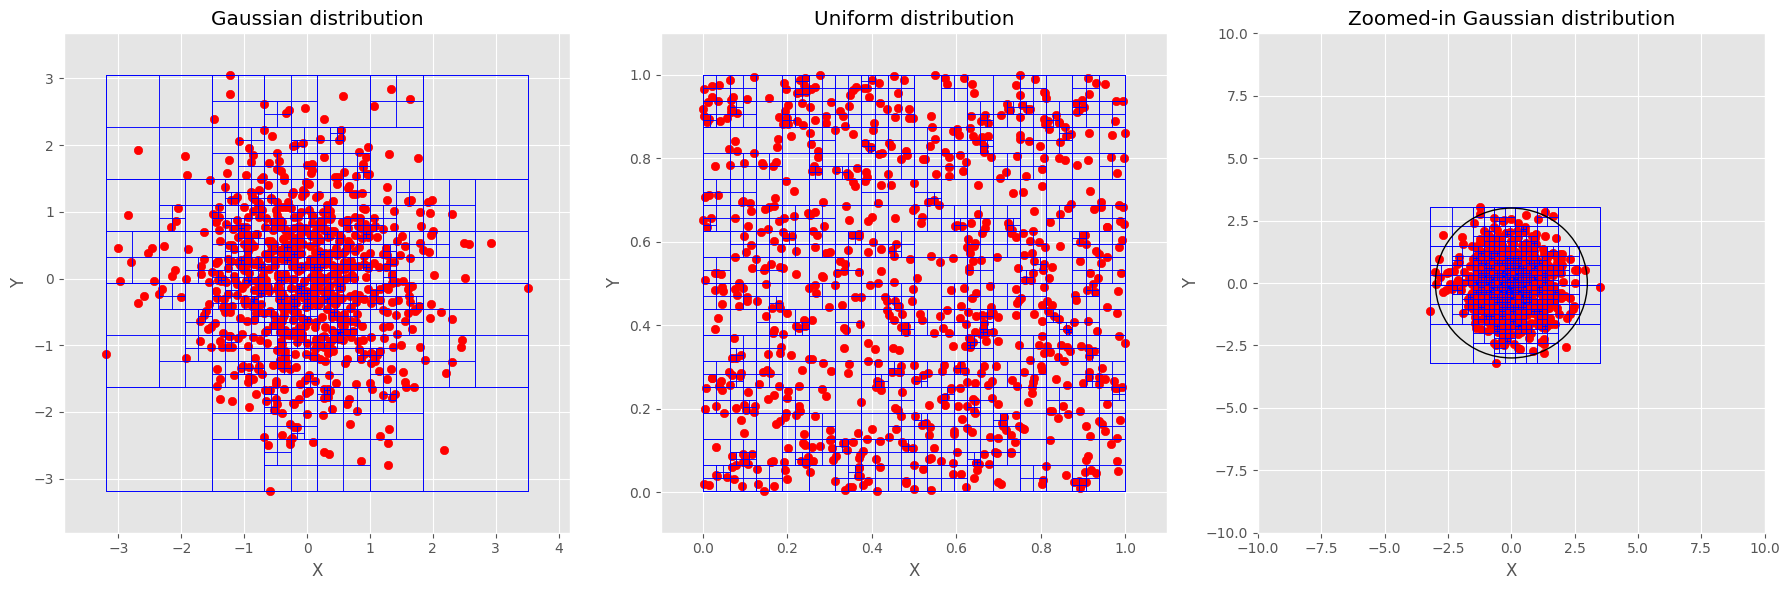

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('ggplot')


def draw_quad_tree(points_df, rectangles_df, graph_name, ax):
    points_x = points_df['pointX']
    points_y = points_df['pointY']

    rect_center_x = rectangles_df['rectCenterX']
    rect_center_y = rectangles_df['rectCenterY']
    rect_width = rectangles_df['rectWidth']
    rect_height = rectangles_df['rectHeight']

    # Plot points
    ax.scatter(points_x, points_y, color='red')

    # Plot rectangles
    for i in range(len(rectangles_df)):
        rect = patches.Rectangle(
            (rect_center_x[i] - rect_width[i] / 2,
             rect_center_y[i] - rect_height[i] / 2),
            rect_width[i],
            rect_height[i],
            linewidth=0.5,
            edgecolor='blue',
            facecolor='none',
        )
        ax.add_patch(rect)

    # Set plot limits
    ax.set_xlim(
        points_x.min() - (points_x.max() - points_x.min()) / 10,
        points_x.max() + (points_x.max() - points_x.min()) / 10
    )
    ax.set_ylim(
        points_y.min() - (points_y.max() - points_y.min()) / 10,
        points_y.max() + (points_y.max() - points_y.min()) / 10
    )

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(graph_name)


# Read points data from CSV
points_df_gaussian = pd.read_csv('QuadTreeGaussianPoints.csv')
rectangles_df_gaussian = pd.read_csv('QuadTreeGaussianRects.csv')

points_df_uniform = pd.read_csv('QuadTreeUniformPoints.csv')
rectangles_df_uniform = pd.read_csv('QuadTreeUniformRects.csv')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Draw QuadTree with Gaussian distribution
draw_quad_tree(points_df_gaussian, rectangles_df_gaussian,
               "Gaussian distribution", ax1)

# Draw QuadTree with Uniform distribution
draw_quad_tree(points_df_uniform, rectangles_df_uniform,
               "Uniform distribution", ax2)

# Zoomed-in version of Gaussian distribution
draw_quad_tree(points_df_gaussian, rectangles_df_gaussian,
               "Zoomed-in Gaussian distribution", ax3)
ax3.set_xlim(-10, 10)  # Set custom X-axis limits for zoom
ax3.set_ylim(-10, 10)  # Set custom Y-axis limits for zoom

# Add black circle
circle = patches.Circle((0, 0), radius=3, linewidth=1,
                        edgecolor='black', facecolor='none')
ax3.add_patch(circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Visualize 2D KD Tree

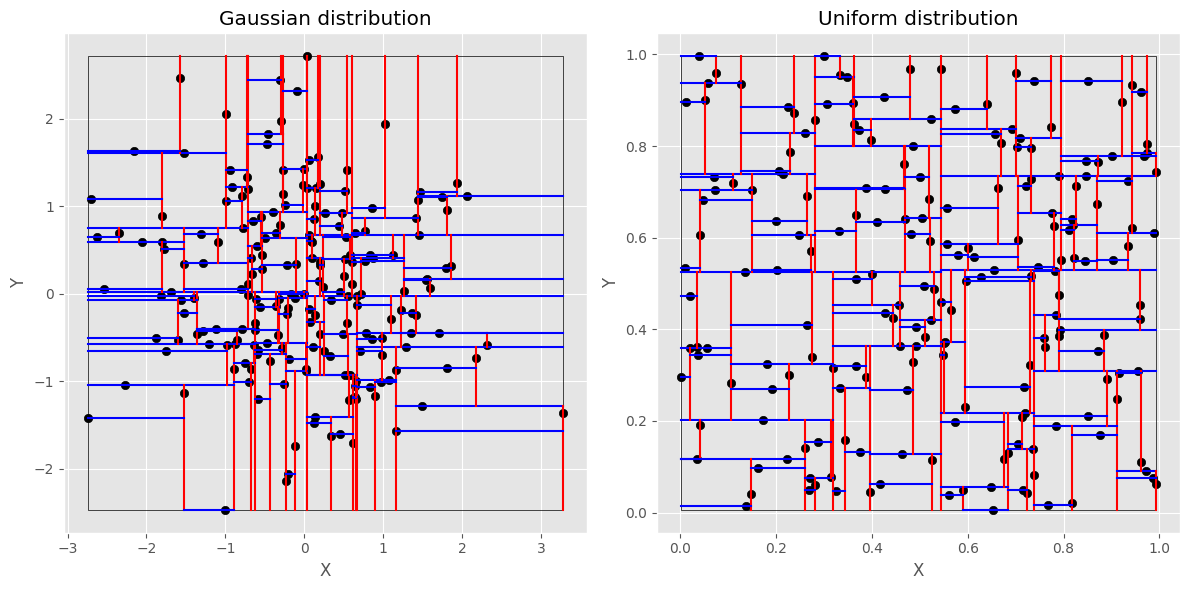

In [56]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_2d_kd_tree(csv_file, graph_title, ax):
    # Load the data from the CSV file
    data = pd.read_csv(csv_file)
    points = data[['pointX', 'pointY']].values

    min_x = min(points[:, 0])
    max_x = max(points[:, 0])
    min_y = min(points[:, 1])
    max_y = max(points[:, 1])

    # Calculate the dimensions of the black rectangle
    rect_width = max_x - min_x
    rect_height = max_y - min_y

    ax.set_title(graph_title)

    # Create a scatter plot of the points in black
    ax.scatter(points[:, 0], points[:, 1], color='black')

    # Plot the split lines
    for i in range(len(data)):
        lineStartX = data['lineStartX'][i]
        lineStartY = data['lineStartY'][i]
        lineEndX = data['lineEndX'][i]
        lineEndY = data['lineEndY'][i]
        splitDim = data['splitDim'][i]

        # Set the color based on splitDim
        if splitDim == 0:
            color = 'red'
        else:
            color = 'blue'

        ax.plot([lineStartX, lineEndX], [lineStartY, lineEndY], color=color)

    # Draw a black rectangle around the points
    rect = plt.Rectangle((min_x, min_y), rect_width, rect_height,
                         edgecolor='black', facecolor='none')
    ax.add_patch(rect)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')


# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generate the plots
plot_2d_kd_tree('2DKDTreeGaussian.csv', 'Gaussian distribution', ax1)
plot_2d_kd_tree('2DKDTreeUniform.csv', 'Uniform distribution', ax2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Timing 2D Bucket KNN With Different K

- 1000 training points, Uniform distribution
- 100 testing points, Uniform distribution

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1843
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.670
Time:                        13:06:47   Log-Likelihood:                -343.79
No. Observations:                  50   AIC:                             691.6
Df Residuals:                      48   BIC:                             695.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8969.7939     61.304    146.317      0.0

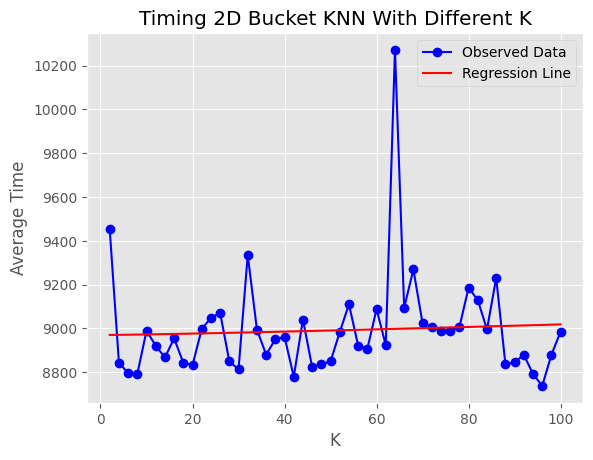

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Read the CSV file
data = pd.read_csv('2DBucketKNNWithDifferentK.csv')

# Extract the k and averageTime values
k_values = data['k']
average_times = data['averageTime']

# Create the plot
plt.plot(k_values, average_times, marker='o',
         color='blue', label='Observed Data')

# Set labels and title
plt.xlabel('K')
plt.ylabel('Average Time')
plt.title('Timing 2D Bucket KNN With Different K')

# Compute the K * logK values
k_log_k_values = k_values * np.log(k_values)

# Add a constant term to the independent variable
X = sm.add_constant(k_log_k_values)

# Perform linear regression
model = sm.OLS(average_times, X)
results = model.fit()

# Print the regression summary
print(results.summary())

# Get the regression line
regression_line = results.params[0] + results.params[1] * k_log_k_values

# Plot the regression line
plt.plot(k_values, regression_line, color='red', label='Regression Line')

# Add legend
plt.legend()

# Show the plot
plt.show()


The average performance of finding K nearest points in a 2D bucket tree with evenly distributed points can be described as logN + KlogK. The logarithmic term (logN) represents the efficient narrowing down of the search space through the hierarchical structure of the tree. The KlogK term accounts for the additional complexity of selecting and sorting the K nearest points within each potential bucket.

However, in this case, the K * logK regression model exhibits a low R^2 value of 0.004, indicating poor fit to the data. Additionally, the p-value of K*logK is not statistically significant. The timing results also show significant fluctuations. The discrepancy in results could be due to various factors, such as the distribution of points, specific data characteristics, or other aspects of the experimental setup. Further investigation may be necessary to determine the underlying cause of these discrepancies and improve the model's performance.

# Timing 2D Bucket KNN With Different N


- N training points, Gaussian distribution
- 100 testing points, Uniform distribution

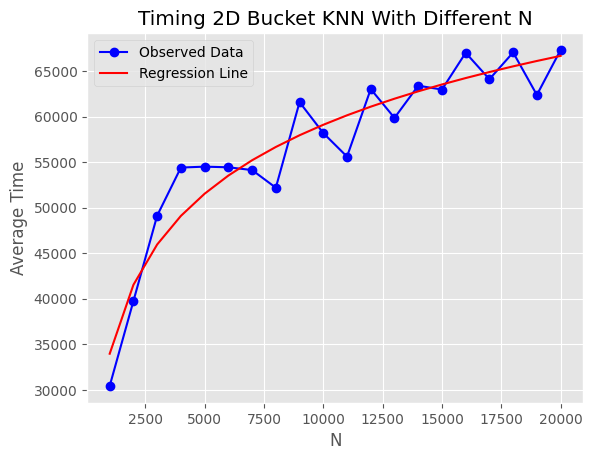

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     175.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.00e-10
Time:                        13:06:48   Log-Likelihood:                -186.89
No. Observations:                  20   AIC:                             377.8
Df Residuals:                      18   BIC:                             379.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.141e+04   7457.213     -5.553      0.0

In [58]:
import numpy as np
import statsmodels.api as sm

# Read the CSV file
data = pd.read_csv('2DBucketKNNWithDifferentN.csv')

# Extract the n and averageTime values
n_values = data['n']
average_times = data['averageTime']
# Compute the N*logN values
log_n_values = np.log(n_values)

# Fit the regression model
X = sm.add_constant(log_n_values)
model = sm.OLS(average_times, X)
results = model.fit()

# Extract the coefficients
intercept = results.params[0]
slope = results.params[1]

# Generate the predicted values
predicted_values = intercept + slope * log_n_values

# Create the plot
plt.plot(n_values, average_times, color='b', marker='o', label='Observed Data')
plt.plot(n_values, predicted_values, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('N')
plt.ylabel('Average Time')
plt.title('Timing 2D Bucket KNN With Different N')

# Show the plot
plt.legend()
plt.show()

print(results.summary())


A 2D bucket tree has a logarithmic time complexity, indicating a growth of O(log N). In the logN regression model, the R^2 value is 0.907, indicating that the model can explain 90.7% of the data, suggesting it is a good fit. The P-value of logN is 0, indicating statistical significance. Overall, the results align with the expected logarithmic growth in the performance of the 2D bucket tree search and validate the effectiveness of the logN regression model.

# Timing Quad Tree KNN With Different Max Points Per Leaf

- 1000 training points, Uniform distributed
- 100 testing points, Uniform distributed

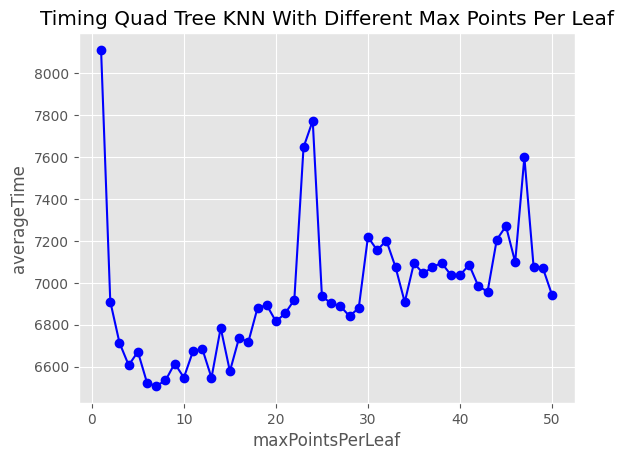

In [59]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('QuadTreeWithDifferentMaxPointsPerLeaf.csv')

# Extract the columns from the DataFrame
maxPointsPerLeaf = data['maxPointsPerLeaf']
averageTime = data['averageTime']

# Create the plot
plt.plot(maxPointsPerLeaf, averageTime, color='blue',
         marker='o', label='Observed Data')
plt.xlabel('maxPointsPerLeaf')
plt.ylabel('averageTime')
plt.title('Timing Quad Tree KNN With Different Max Points Per Leaf')
plt.grid(True)

# Show the plot
plt.show()


Based on our expectations, we initially anticipated that the average time would decrease as we increased the maxPointsPerLeaf value in the Quad Tree KNN algorithm. This expectation stemmed from the assumption that having too few points per leaf might result in excessive searching, while having all points in one leaf would represent a naive KNN approach without any optimization. We hypothesized that there would be a point where a balance is achieved, leading to an optimal tradeoff between search efficiency and optimization.

Based on the data analysis, we can conclude that, in this specific scenario, a `maxPointsPerLeaf` value of around 7 performs the best. From 1 to 7, we observed a significant decrease in average time. However, from 7 to 50, the timing results fluctuated, but generally, the `maxPointsPerLeaf` value increased.

These observed data generally align with my expectation.

# Timing KD Tree KNN With Different Dimensions


- 1000 training points, Gaussian distribution
- 100 testing points, Uniform distribution

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     270.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.39e-05
Time:                        13:06:48   Log-Likelihood:                -55.719
No. Observations:                   7   AIC:                             117.4
Df Residuals:                       4   BIC:                             117.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_squared  -2.392e-11   3.73e-12     -6.418      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


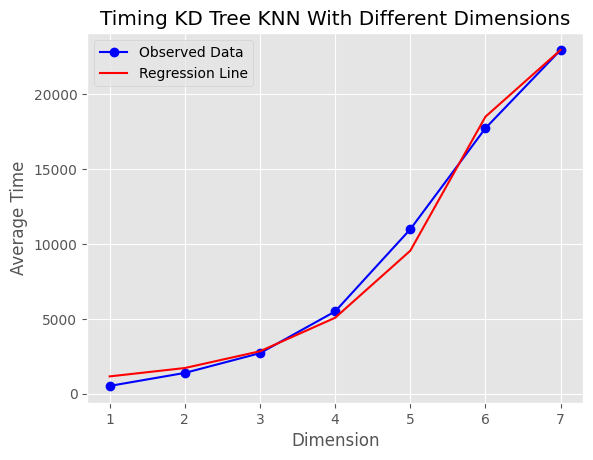

In [60]:
import pandas as pd
import statsmodels.api as sm

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('KDTreeWithDifferentDimension.csv')

# Extract the columns from the DataFrame
dimension = data['dimension']
averageTime = data['averageTime']

# Create the plot
plt.plot(dimension, averageTime, marker='o',
         color='blue', label='Observed Data')

# Create the predictors matrix
X = pd.DataFrame({'x_squared': dimension ** 2, 'x': dimension, 'constant': 1})

# Create a 2^N regression model
regression = sm.OLS(averageTime, X.apply(lambda x: 2**x))

# Fit the model to the data
results = regression.fit()

# Print the regression results
print(results.summary())

# Generate predictions from the fitted model
predictions = results.predict(X.apply(lambda x: 2**x))

# Plot the regression line
plt.plot(dimension, predictions, color='red', label='Regression Line')

# Set plot labels and title
plt.xlabel('Dimension')
plt.ylabel('Average Time')
plt.title('Timing KD Tree KNN With Different Dimensions')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


As the dimensionality increases in a KD tree, the number of sub-branches at each level grows exponentially because the space is divided into two parts along a specific dimension. This exponential growth in the number of sub-branches leads to an expanded search space. During k-nearest neighbor (kNN) queries, the algorithm needs to search through 2^k sub-branches, where k is the number of neighbors required. This exponential growth in the search space causes increased query times and reduced efficiency as the dimensionality increases. Thus, I expect to see a 2^N growth here.

The R-squared value of 0.993 indicates that the regression model explains approximately 99.3% of the variation in the averageTime variable, suggesting a strong fit. However, it's important to note that the reliability of the results may be limited due to the small number of observations (7).

The regression results generally support the expected hypothesis. 